In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import folium
from geopy.geocoders import Nominatim

In [2]:
# Import the dataset
blc = pd.read_csv("./datasets/kaggle/lead-blood-usa-children.csv")

In [3]:
# Print the data
print(blc)

             Entity  Code  Year  Blood lead concentration (1-5 year olds)
0   95th percentile   NaN  1978                                      29.0
1   95th percentile   NaN  1990                                      12.0
2   95th percentile   NaN  1993                                       9.7
3   95th percentile   NaN  2000                                       7.0
4   95th percentile   NaN  2002                                       5.8
5   95th percentile   NaN  2004                                       5.1
6   95th percentile   NaN  2006                                       3.8
7   95th percentile   NaN  2008                                       4.1
8   95th percentile   NaN  2010                                       3.4
9   95th percentile   NaN  2012                                       2.9
10  95th percentile   NaN  2014                                       2.2
11  95th percentile   NaN  2016                                       2.8
12           Median   NaN  1978       

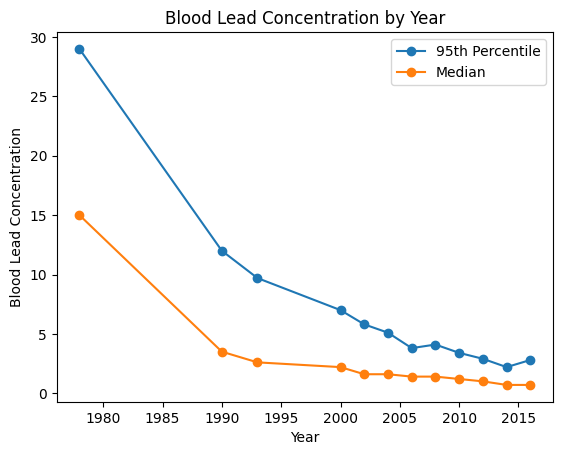

In [4]:
# Filter the data for the 95th percentile
blc_95th = blc[blc['Entity'] == '95th percentile']

# Filter the data for the median
blc_median = blc[blc['Entity'] == 'Median']

# Create a line plot of the 95th percentile blood lead concentration by year
plt.plot(blc_95th['Year'], blc_95th['Blood lead concentration (1-5 year olds)'], '-o', label='95th Percentile')

# Create a line plot of the median blood lead concentration by year
plt.plot(blc_median['Year'], blc_median['Blood lead concentration (1-5 year olds)'], '-o', label='Median')

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Blood Lead Concentration')
plt.title('Blood Lead Concentration by Year')
plt.legend()

# Show the plot
plt.show()


In [5]:
# Import the dataset
lpr = pd.read_csv("./datasets/kaggle/legal-controls-lead-paint.csv")

In [6]:
print (lpr)

            Entity Code  Year lead_paint_regulation
0          Algeria  DZA  2021                   Yes
1        Argentina  ARG  2021                   Yes
2          Armenia  ARM  2021                   Yes
3        Australia  AUS  2021                   Yes
4          Austria  AUT  2021                   Yes
..             ...  ...   ...                   ...
78         Ukraine  UKR  2021                   Yes
79  United Kingdom  GBR  2021                   Yes
80   United States  USA  2021                   Yes
81         Uruguay  URY  2021                   Yes
82         Vietnam  VNM  2021                   Yes

[83 rows x 4 columns]


In [7]:
geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(country):
    location = geolocator.geocode(country)
    return (location.latitude, location.longitude)

lpr["coordinates"] = lpr["Entity"].apply(get_coordinates)
lpr[["Latitude", "Longitude"]] = pd.DataFrame(lpr["coordinates"].tolist(), index=lpr.index)

In [8]:
# Create two separate data frames: one with countries that have regulated blood lead levels, 
# another with countries that have not regulated blood lead levels
lpr_regulated = lpr[lpr['lead_paint_regulation'] == 1]
lpr_not_regulated = lpr[lpr['lead_paint_regulation'] == 0]

# Create a world map
map = folium.Map(location=[48, -102], zoom_start=3)

# Add markers for countries with regulated blood lead levels
world_geo = r'./datasets/world-countries.json'
folium.Choropleth(
    geo_data=world_geo,
    data=lpr_regulated,
    columns=['Entity', 'lead_paint_regulation'],
    key_on='feature.properties.name',
    fill_color='Greens', # green
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Lead Paint Regulation'
).add_to(map)

# Add markers for countries not in the data set
folium.Choropleth(
    geo_data=world_geo,
    data=lpr_not_regulated,
    columns=['Entity', 'lead_paint_regulation'],
    key_on='feature.properties.name',
    fill_color='Reds', # red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Lead Paint Regulation'
).add_to(map)

# Show the map
map.save("map.html")

AttributeError: 'NoneType' object has no attribute 'get'

In [ ]:
from IPython.display import IFrame
IFrame("./map.html", width=700, height=450)